# NiceCX Layout and Styling

In this tutorial, we will show you to use the NetworkN toolbox. The toolbox allows you to load information from a text file and convert it to a network, add information to a network, and change its layout based off of a Cytoscape Styling. NetworkN's toolbox requires Python 2.7.9 and the latest version of the PIP Python package manager for installation. For further details on installing and using the NDEx module, see the NDEx Client Tutorial.

### Import Packages

In [1]:
%matplotlib inline
import ndex2
import networkx as nx
import matplotlib.pyplot as plt

### Load a Network

In [2]:
my_network_uuid = '04c0a7e8-af92-11e7-94d3-0ac135e8bacf'
print("downloading network and buiding NiceCX...")
my_network = ndex2.create_nice_cx_from_server(server='public.ndexbio.org', uuid=my_network_uuid)
#my_network = ndex2.create_nice_cx_from_server(server='public.ndexbio.org', uuid=my_network_uuid, account=my_account, password = my_password)
print("done")
print(my_network.getSummary())

## Apply Cytoscape Visual Properties from a Template Network

Cytoscape has options for styling your graph such as coloration, directional arrow design, etc. NiceCX provides a method to style a network with the Cytoscape Visual Properties of another network. 

For this exercise, we use the "tutorial_template" network from the NDEx Tutorials account that was designed as a template. 

tutorial_template uses the attribute 'st_layout' to determine the coloration of your nodes. Also, the edges are directed (there are arrows pointing in a direction) depending on how you created each edge. The first node that you list points to the second node. This is what the template looks like:

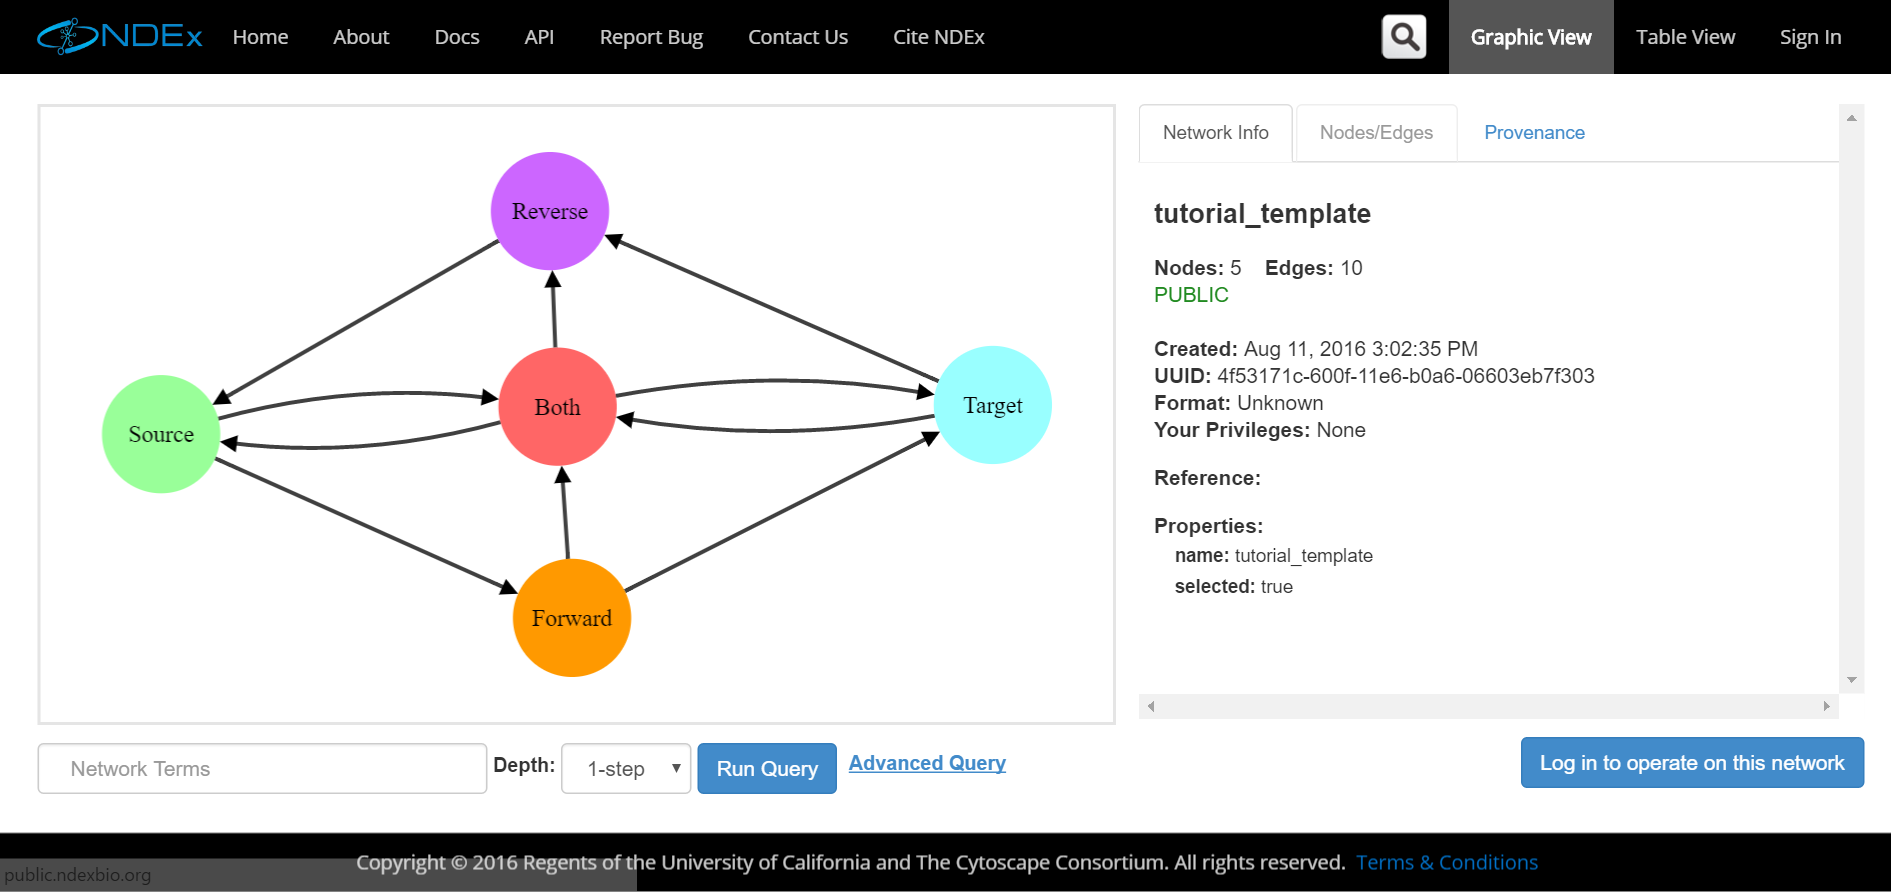

In [23]:
from IPython.display import Image, display;
display(Image(filename='screenshot_4.PNG'))

In [ ]:
template_id = '4f53171c-600f-11e6-b0a6-06603eb7f303'
my_network.apply_template(server='public.ndexbio.org', uuid=template_id)

### Use NetworkX to Apply a Graph Layout

Create a NetworkX graph based on my_network

In [14]:
my_networkx = my_network.to_networkx()

{1: {'st_layout': 'Source', 'name': 'Source'}, 2: {'st_layout': 'Reverse', 'name': 'R1'}, 3: {'st_layout': 'Reverse', 'name': 'R2'}, 4: {'st_layout': 'Reverse', 'name': 'R3'}, 5: {'st_layout': 'Both', 'name': 'B1'}, 6: {'st_layout': 'Both', 'name': 'B2'}, 7: {'st_layout': 'Forward', 'name': 'F1'}, 8: {'st_layout': 'Forward', 'name': 'F2'}, 9: {'st_layout': 'Forward', 'name': 'F3'}, 10: {'st_layout': 'Target', 'name': 'Target'}}


Perform a spring-force layout with NetworkX

In [15]:
nx.drawing.spring_layout(my_networkx)

Get the my_networkx node coordinates and transform to the cartesianCoordinates aspect of my_network

### Upload The Formatted Network

Upload my_network to your NDEx account as a new network.

If you started by loading an one of your networks (such as a clone of the example network), then you can *update* it instead, overwriting its content. 

In the commented line of below, the optional parameter *update_uuid* specifies the update behavior.

In [ ]:
upload_message = my_network.upload(my_server, my_account, my_password)
# upload_message = my_network.upload(my_server, my_account, my_password, update_uuid=my_network_uuid)
print(upload_message)